In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate dates
start_date = datetime(2010, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(2000)]

# Generate data
short_term_rate = np.random.normal(2, 0.5, 2000)
long_term_rate = np.random.normal(4, 0.7, 2000)
rate_spread = long_term_rate - short_term_rate
daily_rate_change = np.random.normal(0, 0.1, 2000)
weekly_volatility = np.random.gamma(2, 0.5, 2000)
yield_curve_steepness = np.random.normal(2, 0.3, 2000)
central_bank_target_rate = np.random.normal(1.5, 0.3, 2000)
inflation_rate = np.random.normal(2, 0.5, 2000)
gdp_growth_rate = np.random.normal(2.5, 1, 2000)
unemployment_rate = np.random.normal(5, 1, 2000)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'ShortTermRate': short_term_rate,
    'LongTermRate': long_term_rate,
    'RateSpread': rate_spread,
    'DailyRateChange': daily_rate_change,
    'WeeklyVolatility': weekly_volatility,
    'YieldCurveSteepness': yield_curve_steepness,
    'CentralBankTargetRate': central_bank_target_rate,
    'InflationRate': inflation_rate,
    'GDPGrowthRate': gdp_growth_rate,
    'UnemploymentRate': unemployment_rate
})

# Add missing values (approximately 5% of the data)
for column in df.columns[1:]:
    mask = np.random.random(len(df)) < 0.05
    df.loc[mask, column] = np.nan

# Add outliers (approximately 1% of the data)
for column in df.columns[1:]:
    mask = np.random.random(len(df)) < 0.01
    df.loc[mask, column] = np.random.uniform(df[column].mean() + 3*df[column].std(), 
                                             df[column].mean() + 5*df[column].std(), 
                                             size=mask.sum())

# Add values that require recoding (e.g., negative rates)
mask = np.random.random(len(df)) < 0.02
df.loc[mask, 'ShortTermRate'] = -df.loc[mask, 'ShortTermRate']
df.loc[mask, 'LongTermRate'] = -df.loc[mask, 'LongTermRate']

# Save the dataset to a CSV file
df.to_csv('interest_rates_dataset.csv', index=False)

print(df.head())

print("\nDataset Info:")
print(df.info())

print(df.describe())

        Date  ShortTermRate  LongTermRate  RateSpread  DailyRateChange  \
0 2010-01-01       2.248357      3.527375    1.279018        -0.086349   
1 2010-01-02       1.930868      3.898837    1.967969        -0.003120   
2 2010-01-03       2.323844      3.445306    1.121462         0.001802   
3 2010-01-04       2.761515           NaN    1.022912         0.047263   
4 2010-01-05       1.882923      2.674470    0.791546        -0.136686   

   WeeklyVolatility  YieldCurveSteepness  CentralBankTargetRate  \
0          0.301225             2.079345               1.952857   
1          0.488812             2.019111                    NaN   
2          0.702602             1.934952               1.652966   
3          1.498935             1.912173               1.715322   
4          1.807125             2.150570               1.844089   

   InflationRate  GDPGrowthRate  UnemploymentRate  
0       1.243360       1.954345          5.466322  
1       1.347726       3.278683          6.42225

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
df = pd.read_csv('interest_rates_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Data Cleaning

### Handle missing values

In [8]:
def handle_missing_values(df):
    # For numeric columns, fill missing values with the median
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        df[column] = df[column].fillna(df[column].median())
    return df

### Handle Outliers

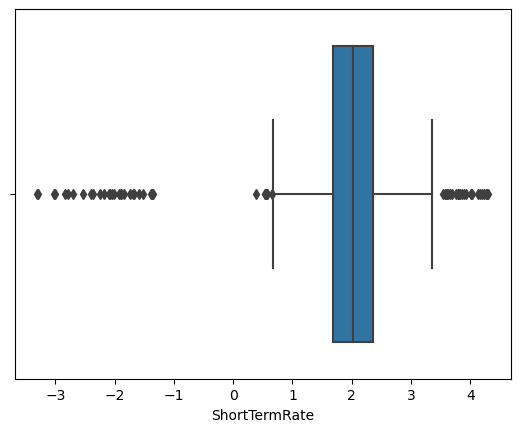

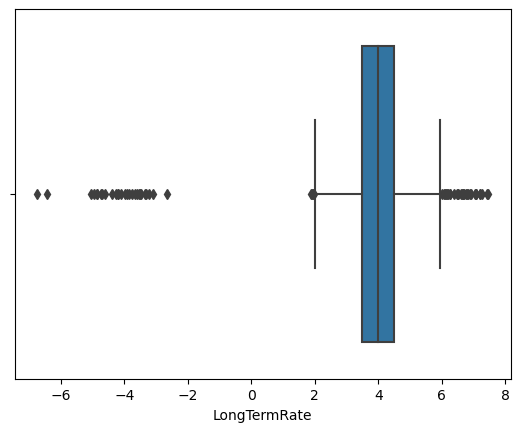

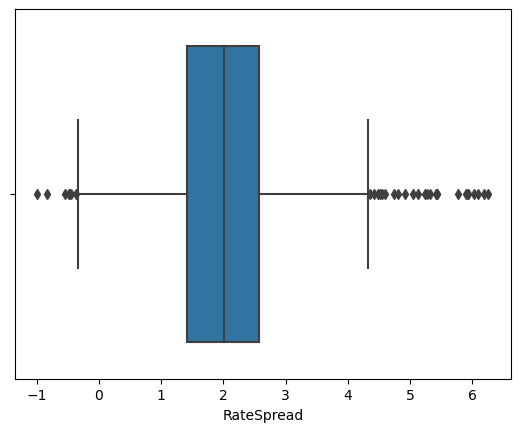

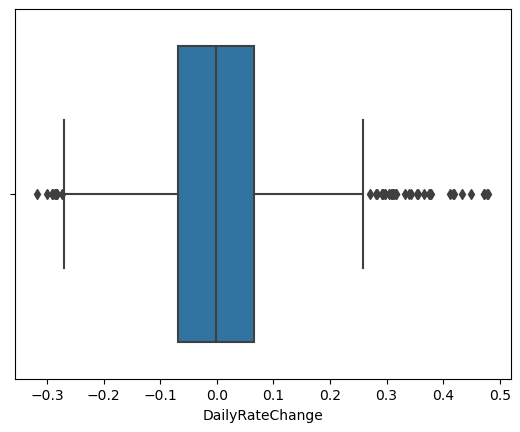

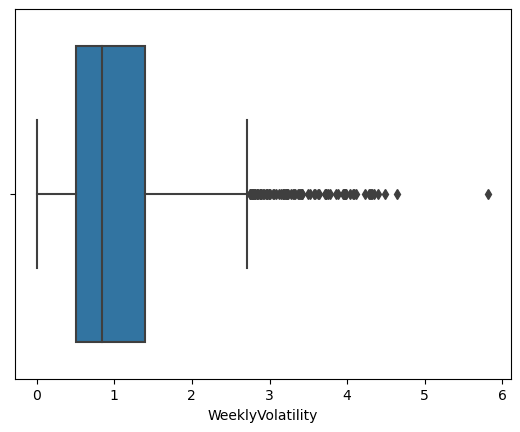

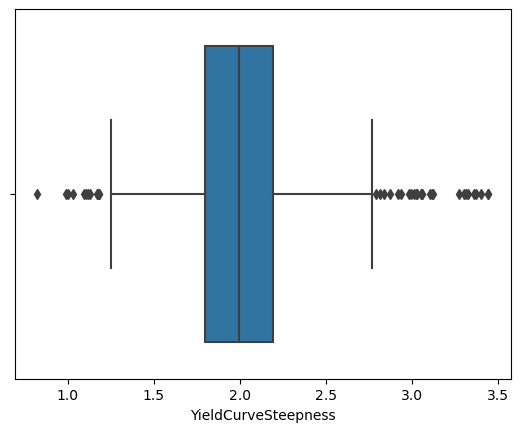

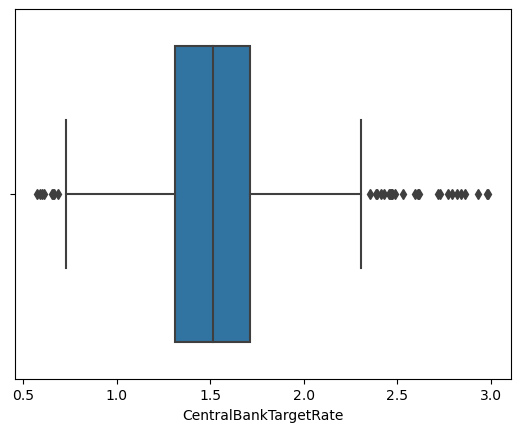

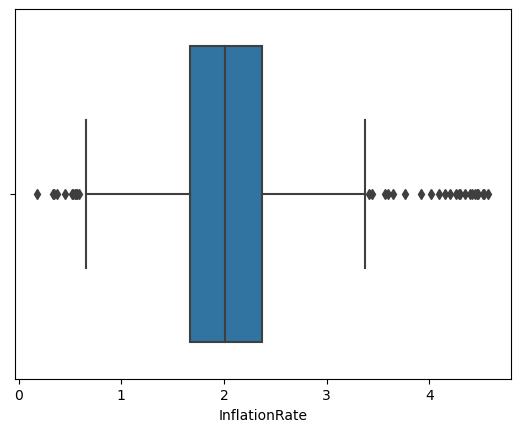

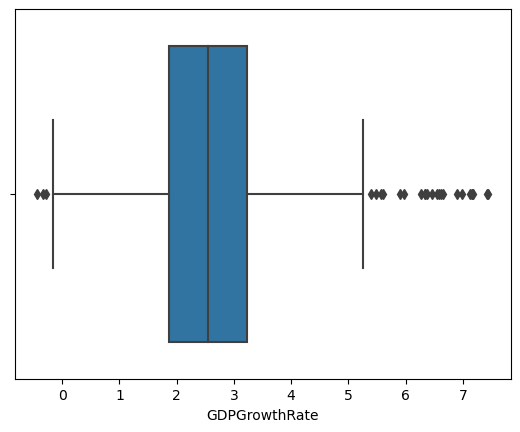

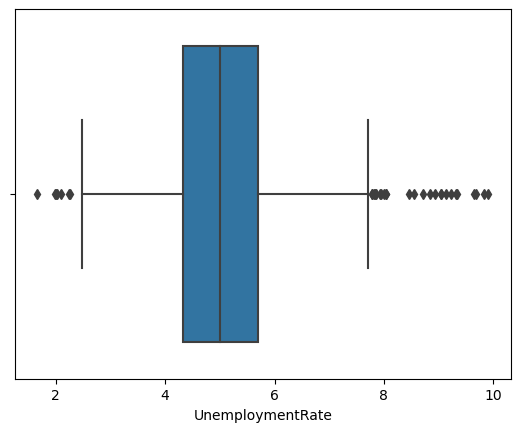

In [11]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [13]:
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

### Recode negative interest rates

In [16]:
def recode_negative_rates(df):
    rate_columns = ['ShortTermRate', 'LongTermRate', 'CentralBankTargetRate']
    for column in rate_columns:
        df[column] = df[column].abs()
    return df

### Rounding off decimal values to 3 decimal places

In [22]:
def round_decimal_values(df):
    numeric_columns = df.select_dtypes(include=['float64']).columns
    for column in numeric_columns:
        df[column] = df[column].round(3)
    return df

## Applying cleaning functions

In [26]:
try:
    df_cleaned = (df
                  .pipe(handle_missing_values)
                  .pipe(remove_outliers)
                  .pipe(recode_negative_rates)
                  .pipe(round_decimal_values))
except Exception as e:
    print(f"Error in data cleaning process: {e}")
    raise

In [31]:
print(df_cleaned.info())
print("\nMissing values summary:")
print(df_cleaned.isnull().sum())
print("\nFirst few rows of cleaned data:")
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1568 non-null   datetime64[ns]
 1   ShortTermRate          1568 non-null   float64       
 2   LongTermRate           1568 non-null   float64       
 3   RateSpread             1568 non-null   float64       
 4   DailyRateChange        1568 non-null   float64       
 5   WeeklyVolatility       1568 non-null   float64       
 6   YieldCurveSteepness    1568 non-null   float64       
 7   CentralBankTargetRate  1568 non-null   float64       
 8   InflationRate          1568 non-null   float64       
 9   GDPGrowthRate          1568 non-null   float64       
 10  UnemploymentRate       1568 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 147.0 KB
None

Missing values summary:
Date                     0
ShortTermRat

In [33]:
df_cleaned.to_csv('cleaned_interest_rates_dataset.csv', index=False)

# Cleaned data saved to 'cleaned_interest_rates_dataset.csv'")